In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy
import importlib
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, chi2

In [2]:
#input
ric = 'ANTO.L' # ^IXIC DBK.DE CLP=X ANTO.L

#get market data

path = 'C:\\Users\matis\\OneDrive - Universidad de Concepción\\Notebooks\\Programacion\\Finanzas\\' + ric + '.csv'
table_raw = pd.read_csv(path)

# create table of returns
t = pd.DataFrame()
t['date'] = pd.to_datetime(table_raw['Date'], dayfirst=True)
t['close'] = table_raw['Close']
t.sort_values(by='date', ascending=True)
t['close_previous'] = t['close'].shift(1)
t['return_close'] = t['close']/t['close_previous'] -1
t = t.dropna()
t = t.reset_index(drop=True)

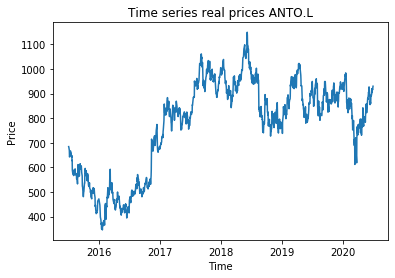

In [3]:
#plot timeseries of prices

plt.figure()
plt.plot(t['date'],t['close'])
plt.title('Time series real prices ' + ric)
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [4]:
# input for Jarque-Bera test

x = t['return_close'].values # returns
x_str = 'Real returns ' + ric # label e.g. ric
x_size = t['return_close'].shape[0] # size of returns (también len(x))

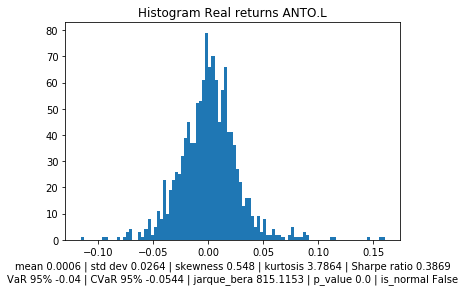

In [8]:
## Recycled code ##

# compute "risk metrics"
x_mean = np.mean(x) #media
x_std = np.std(x) #volatility (volatibilidad) en mercados financieros
x_skew = skew(x)  #Skewness para ver qué tan simétrica es
x_kurt = kurtosis(x) #Kurtosis para ver qué tantas colas largas tiene
x_sharpe = x_mean/x_std * np.sqrt(252) #coeficiente de Sharpe (annualised: x_mean crece lineal en el tiempo y x_stdev raíz cuadrada en el tiempo)
x_median = np.percentile(x, 50) # 
x_var_95 = np.percentile(x,5)  #Valor en riesgo
x_cvar_95 = np.mean(x[x <= x_var_95]) #CVaR: Valor en riesgo condicional (promedio de pérdidas)
JB = x_size/6*(x_skew**2 + 1/4*x_kurt**2) #Estadístico Jarque-Bera
p_value = 1-chi2.cdf(JB, df=2) #p-value chi cuadrado símil al JB
is_normal = (p_value > 0.05)  #Para saber si la distribución es normal o no.

#el VaR y CVaR sigue dando lo mismo si la distribución no es normal.
# print metrics
round_digits = 4
str1 = 'mean ' + str(np.round(x_mean,round_digits))\
    + ' | std dev ' + str(np.round(x_std,round_digits))\
    + ' | skewness ' + str(np.round(x_skew,round_digits))\
    + ' | kurtosis ' + str(np.round(x_kurt,round_digits))\
    + ' | Sharpe ratio ' + str(np.round(x_sharpe,round_digits))
str2 = 'VaR 95% ' + str(np.round(x_var_95,round_digits))\
    + ' | CVaR 95% ' + str(np.round(x_cvar_95,round_digits))\
    + ' | jarque_bera ' + str(np.round(JB,round_digits))\
    + ' | p_value ' + str(np.round(p_value,round_digits))\
    + ' | is_normal ' + str(is_normal)

##plot histogram (Distribucion de rendimientos/ganancias y pérdidas)
plt.figure() #genera la figura
plt.hist(x, bins=100) #crea el histograma y bins adelgaza las "barritas"
plt.title('Histogram ' + x_str)
plt.xlabel(str1 + '\n' + str2)
#plt.xlabel(plot_str)
plt.show() #muestra la figura